In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date,datetime
import DateTime
from scipy.stats import norm, skew
from scipy import stats
#import statsmodels.api as sm

In [33]:
# importing libraries for data visualisations
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None
# Standard plotly imports
import plotly as py
#import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#import cufflinks as cf
#cf.set_config_file(offline=True)
#import cufflinks
#cufflinks.go_offline(connected=True)
#init_notebook_mode(connected=True)

In [34]:
#!pip install plotly

In [35]:
# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#import xgboost
#from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

# Exploratory Data Analysis

The EDA is the first step of our machine learning modeling. It's gonna composed of 3 subsections. First of all we're going to take a look at the structure of our dataset in order to insight about our variable. This first subsection will help us to know different type of the variables and the shape of the dataset, to check variables with missing values. After we are going the feature engineering and feature transformation task where we correct type of some variables, treat missing values,tansform and normalize variables.

## Data Overview

In [37]:
# #df = pd.merge(pred,targ, on='account_id', how = 'left')
# import dtale

In [12]:
df1 = pd.read_csv('churndata_10_20.csv', low_memory=False)


In [13]:
df = df1.copy()
df.head()

,account_id,account_number,account_status,arrhes_day,price_program,arrhes,total_amount,minimum_payment,gap,invoce_model,created_at,total_payed,next_payment,group_name,prev_payment,prev_account_number,slug,cutoff_days,register_by,day_disabled,written_off,written_off_at,expected_total_amount,repossessed_at,commune,region,country
0,55939,50130243,Unlocked,1.0,1000.0,1000.0,39000,1000.0,1.0,2,2020-02-11,39000,NaN,WowSolar100 - Cash - NGR,2020-02-12,NaN,ac559392020,0.0,518,1,False,NaN,39000,NaN,AKINYELE,OYO,Nigeria
1,28483,8871048,Deactive,30.0,3500.0,3500.0,126000,NaN,30.0,1,2017-10-12,84000,2020-10-03,PrePayee _3500/3500,2020-09-03,NaN,AC248085,-4.0,45,368,False,NaN,126000,NaN,TATAGUINE,FATICK,Senegal
2,57611,50126319,Unlocked,1.0,1000.0,1000.0,39000,1000.0,1.0,2,2020-03-26,39000,NaN,WowSolar100 - Cash - NGR,2020-03-27,NaN,ac576112020,0.0,3208,1,False,NaN,39000,NaN,ESAN NORTH-EAST,EDO,Nigeria
3,55645,NaN,Detached,30.0,3750.0,7500.0,52500,0.0,NaN,1,2020-02-04,0,NaN,WowSolar100 - 7500/3750 - NGR,NaN,70055937,ac556452020,0.0,2899,0,False,NaN,52500,2020-02-04,IKENNE,OGUN,Nigeria
4,176,70026498,Unlocked,NaN,NaN,NaN,255000,0.0,NaN,2,2018-03-28,255000,NaN,WowSolarTV19 - Cash - SN,2018-03-28,00039060,ac1762018,0.0,14,0,False,NaN,255000,NaN,KHELCOM BIRAME,KAOLACK,Senegal


In [14]:
df.columns

Index(['account_id', 'account_number', 'account_status', 'arrhes_day',
       'price_program', 'arrhes', 'total_amount', 'minimum_payment', 'gap',
       'invoce_model', 'created_at', 'total_payed', 'next_payment',
       'group_name', 'prev_payment', 'prev_account_number', 'slug',
       'cutoff_days', 'register_by', 'day_disabled', 'written_off',
       'written_off_at', 'expected_total_amount', 'repossessed_at', 'commune',
       'region', 'country'],
      dtype='object')

In [15]:
df.dtypes

account_id                 int64
account_number            object
account_status            object
arrhes_day               float64
price_program            float64
arrhes                   float64
total_amount               int64
minimum_payment          float64
gap                      float64
invoce_model               int64
created_at                object
total_payed                int64
next_payment              object
group_name                object
prev_payment              object
prev_account_number       object
slug                      object
cutoff_days              float64
register_by                int64
day_disabled               int64
written_off                 bool
written_off_at            object
expected_total_amount      int64
repossessed_at            object
commune                   object
region                    object
country                   object
dtype: object

In [16]:
df.shape

(63722, 27)

## Numerical variables overview

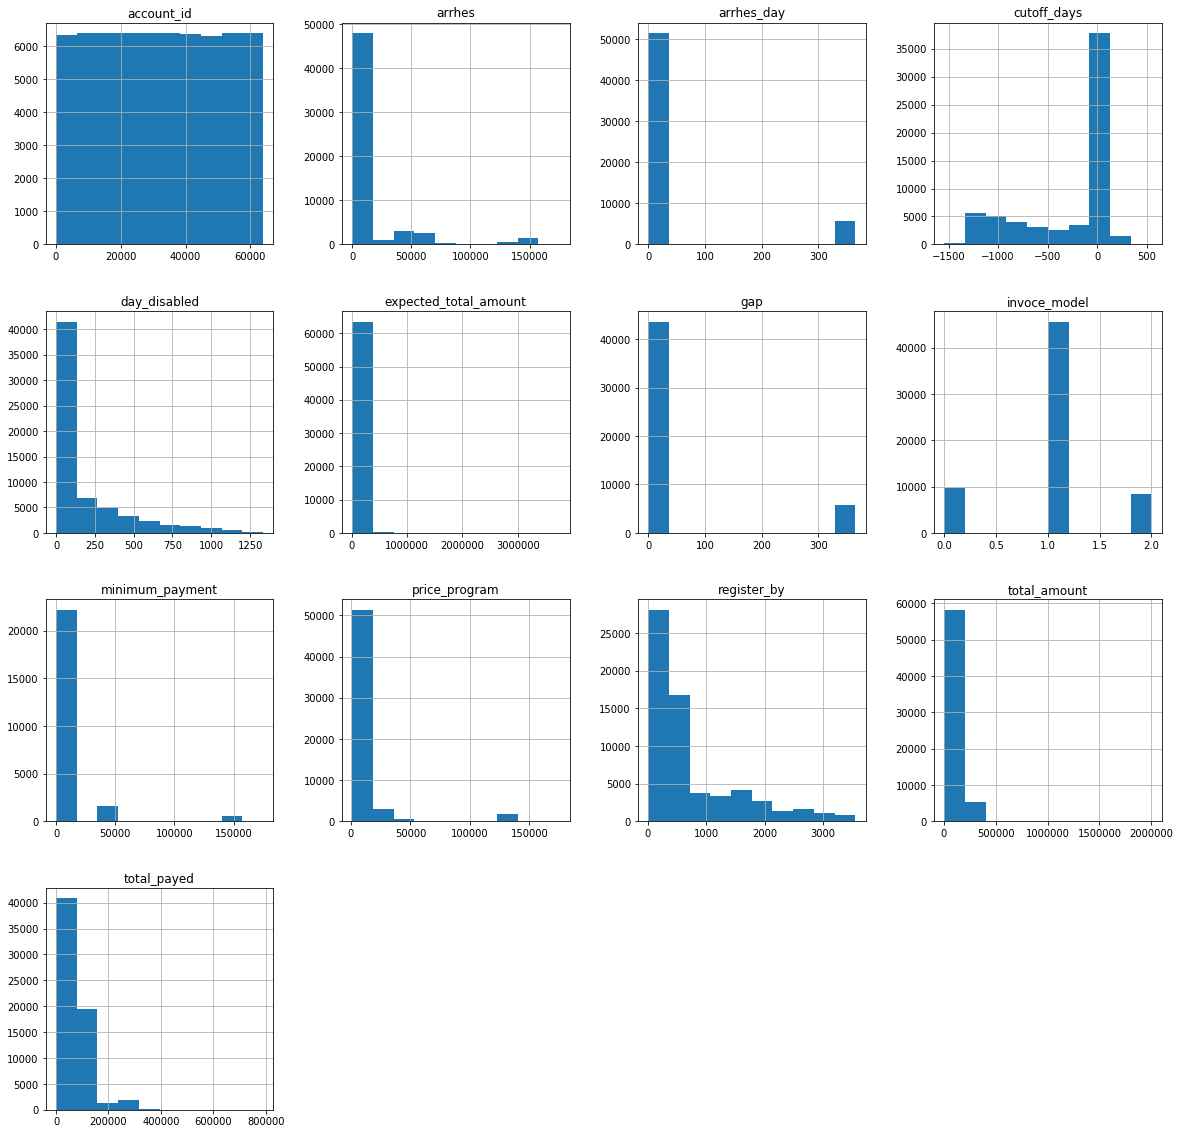

In [17]:
# Nuemerical overview
var_num = [var for var in df.columns if df[var].dtypes in('float64','int64')]
df[var_num].hist(figsize=(20,20))
plt.show()

From these histograms we can see that the account_id and the client_id are almost uniformly distributed and that can justify that they are Id for observations.The account_number and previous_account number have almost the same probability distribution. Some feature here are also redondant for gap, arrhes_day and register_by and user_id and total_amount and expected_total_amount. We notice that few feature here countinous variable which are total_amount,expected_amount_paid,total_payed,day_disabled,cutoff_days and the emaining numerical variable are discret.
The day_disabled and the total_payed feature are right skew, so some normalization technics must be applied to them.

In [18]:
num = ['arrhes_day', 'price_program',
       'arrhes', 'total_amount', 'minimum_payment', 'invoce_model',
        'total_payed','cutoff_days', 'day_disabled', 'expected_total_amount']
info = df[num].describe()

In [19]:
info.head()

,arrhes_day,price_program,arrhes,total_amount,minimum_payment,invoce_model,total_payed,cutoff_days,day_disabled,expected_total_amount
count,57238.000000,57058.000000,57238.000000,63722.000000,24579.000000,63722.000000,63722.000000,63722.000000,63722.000000,63722.000000
mean,62.504647,10916.159872,14835.936808,117901.639167,7532.462671,0.979944,67037.950614,-295.571034,174.032014,118850.496689
std,100.724598,25790.790667,28287.983079,68565.061827,26382.342938,0.532528,59659.113859,456.448899,262.066343,75508.275014
min,0.000000,1000.000000,0.000000,5800.000000,0.000000,0.000000,0.000000,-1542.430000,0.000000,5800.000000
25%,30.000000,3500.000000,3500.000000,85500.000000,0.000000,1.000000,21000.000000,-650.190000,1.000000,85500.000000


In [20]:
df[var_num].columns

Index(['account_id', 'arrhes_day', 'price_program', 'arrhes', 'total_amount',
       'minimum_payment', 'gap', 'invoce_model', 'total_payed', 'cutoff_days',
       'register_by', 'day_disabled', 'expected_total_amount'],
      dtype='object')

## Missing values overview

In [21]:
# Let's make the list of variables that contains missing values
var_na = [var for var in df.columns if df[var].isnull().sum()>1]
# Let's show the variable and the percentage of missing values
for var in var_na:
    print(var, np.round(100*df[var].isnull().mean(),3), '% missing values')

account_number 25.687 % missing values
account_status 0.024 % missing values
arrhes_day 10.175 % missing values
price_program 10.458 % missing values
arrhes 10.175 % missing values
minimum_payment 61.428 % missing values
gap 22.524 % missing values
next_payment 35.49 % missing values
prev_payment 1.113 % missing values
prev_account_number 63.567 % missing values
written_off_at 62.274 % missing values
repossessed_at 87.879 % missing values
country 0.02 % missing values


We find that there 13 columns with missing values. 4 of them are date features. Usually dates are not predictive but we can use them to compute period or age features which will be predictive. We gonna remove the next_payment and the repossessed_at date because the first one is used to compute the cutoff_days dispite it has few missing values and the second has almost 90% missing values and written_off_at too. for the prev_payment where we only miss 1.45% of the observations, we gonna replace the missing values by the created_at date and used it to create a new columns that give the #days since last payment. The gap and the minimum_payment: the first one could create redondancy with the harres feature and the second one has 80% of the data missing.
the missing  values of account_number and prev_account_number can be explained by the repossession and replacement of the system. thefore we can deal with those to columns to to check wether this was a replacement or not in a account and after we should remove them.


In [22]:
num_variables = [var for var in df.columns if df[var].dtypes !='O']
none_num = df.shape[1]-len(num_variables)
print('there are %(num_var)d numerical variables and %(none_num)d none numerical in the data set ' %{"num_var":len(num_variables),"none_num":none_num})

there are 14 numerical variables and 13 none numerical in the data set 


# Univariate & Bivariate Analysis

### Status

In [23]:
df['account_status'].value_counts()

Unlocked    22685
Detached    16350
Active      12413
Deactive    12259
Name: account_status, dtype: int64

In [27]:
AccountStatus = pd.DataFrame(columns = ['status','% churned'])
i=0
for status in list(df['account_status'].unique()):
#     ratio = df[(df['account_status']==status)&(df['written_off']==True)].shape[0] / df[df['account_status']==status].shape[0]
    print(status)
    AccountStatus.loc[i] = (status, ratio*100)
    i += 1   
df_Status= AccountStatus.groupby(by="status").sum()
#df_Status.iplot(kind='bar',title='Chuned account by Status (%)')
df_Status

Unlocked
Deactive
Detached
Active
nan


,% churned
status,
Active,0.016112
Deactive,0.016112
Detached,0.016112
Unlocked,0.016112


Here we see that 95.35% of the accounts are churned 33 % are desactived. Only few active and unlocked accounts (0.01%) are now churned and that might be some outliers cause active and unlocked accounts are not supposes to be churned.

### Product type

In [20]:
df['product_type'].value_counts()

Sun King Home 60 Easy Buy    39690
WowSolar60                    4893
WowSolarTV19                  3023
WowSolar100                   1790
Solar Fan                      286
Hair Clipper                    11
Name: product_type, dtype: int64

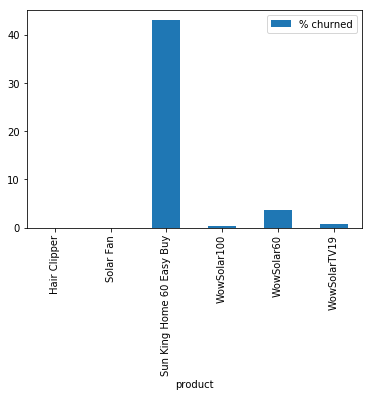

In [21]:
typeproduct = pd.DataFrame(columns = ['product','% churned'])
i=0
for product in list(df['product_type'].unique()):
    ratio = df[(df['product_type']==product)&(df['written_off']==True)].shape[0] / df[df['product_type']==product].shape[0]
    typeproduct.loc[i] = (product, ratio*100)
    i += 1   
df_product= typeproduct.groupby(by="product").sum()
df_product.plot(kind='bar')

Most of the chuners are SHS systems (>45%) followed by the the Wowsolar60 (<5%). Few TV are churned (<2%) and No Hair CLipper or Solar Fan are churned.

### Group name

In [22]:
df['group_name'].value_counts()

PrePayee _3500/3500                             26393
PrePayee_8500/4250                               4559
PAYG 9000/4500                                   2480
Chef_PrePayee_0/3500                             2086
Chef_PrePayee_4250/4250                          1847
WowSolar60 - Mensuel - BF                        1519
WowSolar60 - Mensuel - ML                        1307
WowSolarTV - Annuité - SN                         771
WowSolarTV - Mensuel - SN                         736
Paiement Annuel 35 000 / 35 000                   731
Achat Direct - 60 000                             641
WowSolar100 - Cash - NGR                          637
WowSolar100 - Monthly - NGR                       635
PAYG Cash Sales - 70000                           444
WowSolar60 - Annuel - BF                          435
WowSolarTV - Mensuel - ML                         380
WowSolar100 - Annual - NGR                        360
Vente Annuelle (41500 x 2)                        341
WowSolar60 - Cash - ML      

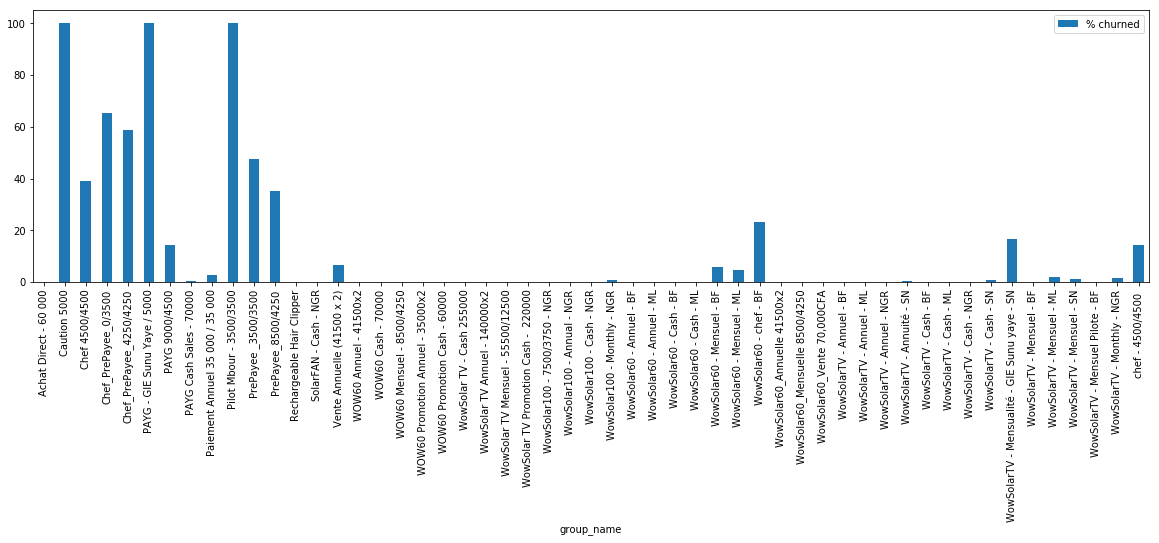

In [23]:
Groups = pd.DataFrame(columns = ['group_name','% churned'])
i=0
for group in list(df['group_name'].unique()):
    ratio = df[(df['group_name']==group)&(df['written_off']==True)].shape[0] / df[df['group_name']==group].shape[0]
    Groups.loc[i] = (group, ratio*100)
    i += 1   
df_group= Groups.groupby(by="group_name").sum()
df_group.plot(kind ='bar',figsize=(20,5) )

### Country

In [24]:
df['country'].value_counts()

Senegal    37745
Mali        6682
Burkina     2653
Nigeria     2443
Niger        170
Name: country, dtype: int64

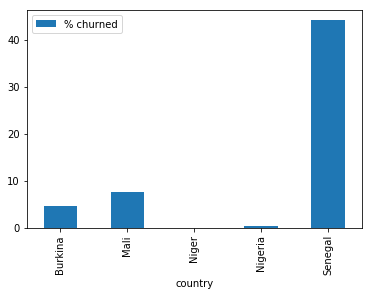

In [25]:
Countries = pd.DataFrame(columns = ['country','% churned'])
i=0
for country in list(df['country'].unique()):
    ratio = df[(df['country']==country)&(df['written_off']==True)].shape[0] / df[df['country']==country].shape[0]
    Countries.loc[i] = (country, ratio*100)
    i += 1   
df_country= Countries.groupby(by="country").sum()
df_country.plot(kind ='bar')

Almost 50% of the churners are from sengal, Mali come on the second position with 12% of churners and followed by Burkina with 7%. Nigeria as less than 5% of the churners and no customer is churned in Niger yet.

### Invoice Model

In [26]:
df['invoce_model'].value_counts()

1    39317
0     7330
2     3046
Name: invoce_model, dtype: int64

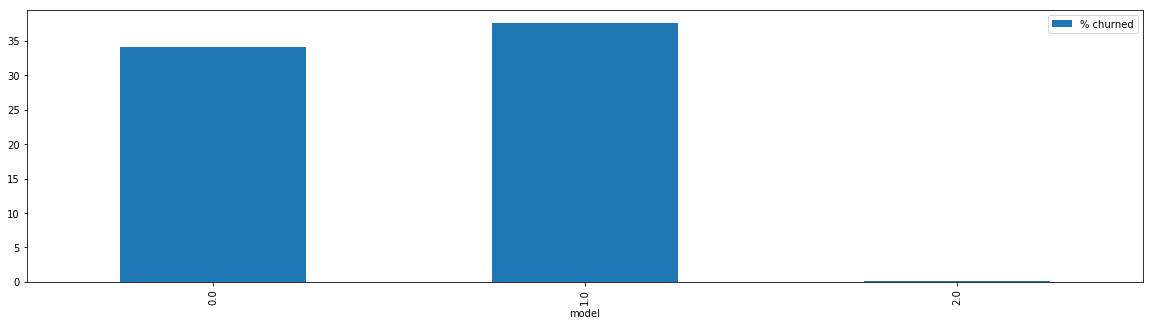

In [27]:
invoiceModel = pd.DataFrame(columns = ['model','% churned'])
i=0
for invoice in list(df['invoce_model'].unique()):
    ratio = df[(df['invoce_model']==invoice)&(df['written_off']==True)].shape[0] / df[df['invoce_model']==invoice].shape[0]
    invoiceModel.loc[i] = (invoice, ratio*100)
    i += 1   
df_invoice= invoiceModel.groupby(by="model").sum()
df_invoice.plot(kind ='bar',figsize=(20,5) )

In [28]:
df.columns

Index(['account_id', 'account_number', 'status', 'arrhes_day', 'price_program',
       'arrhes', 'total_amount', 'minimum_payment', 'gap', 'invoce_model',
       'user_id', 'group_id', 'created_at', 'total_payed', 'next_payment',
       'group_name', 'prev_payment', 'prev_account_number', 'slug',
       'cutoff_days', 'register_by', 'day_disabled', 'written_off',
       'written_off_at', 'expected_total_amount', 'repossessed_at',
       'id_client', 'id_tenant', 'commune', 'region', 'country',
       'account_status', 'product_type'],
      dtype='object')

### Arrhes Days

In [29]:
df['arrhes_day'].describe()

count    47376.000000
mean        53.351275
std         85.960130
min          0.000000
25%         30.000000
50%         30.000000
75%         30.000000
max        365.000000
Name: arrhes_day, dtype: float64

In [30]:
df2 = df.copy()
df2.fillna(0,inplace = True)
a1 = df2.loc[df['written_off']==True,'arrhes_day']
a2 = df2.loc[df['written_off']== False,'arrhes_day']
# Group data together
arrhes_data = [a1, a2]
group_labels = ['chuners', 'none_churners']
# Create distplot with custom bin_size
fig = ff.create_distplot(arrhes_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(title='Arrhes days Distribution in Percent by churn status')
fig['layout'].update(xaxis=dict(range=[15, 60], dtick=5))
# Plot
plot(fig, filename='Distplot with Multiple Datasets')

C:\Users\OSN-AN\Anaconda3\lib\site-packages\plotly\offline\offline.py:562: UserWarning:

Your filename `Distplot with Multiple Datasets` didn't end with .html. Adding .html to the end of your file.



'Distplot with Multiple Datasets.html'

### Pricing Program


In [31]:
print(df['price_program'].value_counts())

3500.0      29121
4250.0       6866
4500.0       5606
35000.0      1500
140000.0      772
12500.0       762
1000.0        637
13000.0       547
41500.0       383
22500.0       360
130000.0      300
8500.0        191
3750.0        158
82000.0        72
9500.0          5
5000.0          2
139000.0        1
Name: price_program, dtype: int64


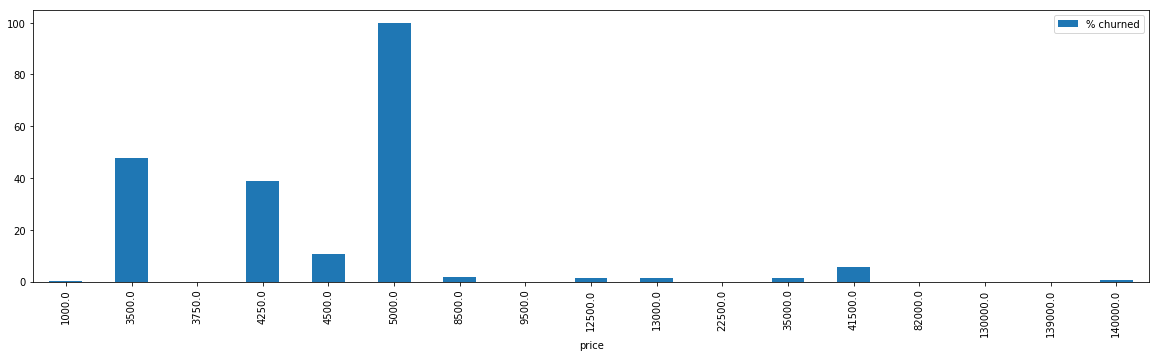

In [32]:
PriceProgram = pd.DataFrame(columns = ['price','% churned'])
i=0
for price in list(df['price_program'].unique()):
    if df[df['price_program']==price].shape[0]:   
        ratio = df[(df['price_program']==price)&(df['written_off']==True)].shape[0] / df[df['price_program']==price].shape[0]
    PriceProgram.loc[i] = (price, ratio*100)
    i += 1   
df_Price= PriceProgram.groupby(by="price").sum()
df_Price.plot(kind ='bar',figsize=(20,5) )

### Total amount paid

In [33]:
df['total_payed'].describe()

count     49693.000000
mean      52136.546274
std       40531.136709
min           0.000000
25%       17500.000000
50%       45000.000000
75%       80050.000000
max      495273.000000
Name: total_payed, dtype: float64

In [34]:
df2 = df.copy()
df2.fillna(0,inplace = True)
a1 = df2.loc[df['written_off']==True,'total_payed']
a2 = df2.loc[df['written_off']== False,'total_payed']
# Group data together
TotalPayed = [a1, a2]
group_labels = ['chuners', 'none_churners']
# Create distplot with custom bin_size
fig = ff.create_distplot(TotalPayed, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(title='Total amount payed Distribution in Percent by churn status')
fig['layout'].update(xaxis=dict(range=[0, 300000], dtick=10000))
# Plot
plot(fig, filename='Distplot with Multiple Datasets')

C:\Users\OSN-AN\Anaconda3\lib\site-packages\plotly\offline\offline.py:562: UserWarning:

Your filename `Distplot with Multiple Datasets` didn't end with .html. Adding .html to the end of your file.



'Distplot with Multiple Datasets.html'

### Total Amount

In [35]:
df['total_amount'].describe()

count    4.969300e+04
mean     1.199719e+05
std      5.188140e+04
min      5.800000e+03
25%      1.020000e+05
50%      1.260000e+05
75%      1.260000e+05
max      2.000000e+06
Name: total_amount, dtype: float64

In [36]:
df2 = df.copy()
df2.fillna(0,inplace = True)
a1 = df2.loc[df['written_off']==True,'total_amount']
a2 = df2.loc[df['written_off']== False,'total_amount']
# Group data together
TotalAmount = [a1, a2]
group_labels = ['chuners', 'none_churners']
# Create distplot with custom bin_size
fig = ff.create_distplot(TotalAmount, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(title='Total amount to paid Distribution in Percent by churn status')
fig['layout'].update(xaxis=dict(range=[0, 300000], dtick=10000))
# Plot
plot(fig, filename='Distplot with Multiple Datasets')

C:\Users\OSN-AN\Anaconda3\lib\site-packages\plotly\offline\offline.py:562: UserWarning:

Your filename `Distplot with Multiple Datasets` didn't end with .html. Adding .html to the end of your file.



'Distplot with Multiple Datasets.html'

### Mininum payment

In [37]:
df['minimum_payment'].describe()

count     10527.000000
mean       3995.582787
std       10351.365677
min           0.000000
25%           0.000000
50%           0.000000
75%         100.000000
max      140000.000000
Name: minimum_payment, dtype: float64

In [38]:
df2 = df.copy()
df2.fillna(0,inplace = True)
a1 = df2.loc[df['written_off']==True,'minimum_payment']
a2 = df2.loc[df['written_off']== False,'minimum_payment']
# Group data together
minimum = [a1, a2]
group_labels = ['chuners', 'none_churners']
# Create distplot with custom bin_size
fig = ff.create_distplot(minimum, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(title='Minimum payment Distribution in Percent by churn status')
fig['layout'].update(xaxis=dict(range=[0, 2000], dtick=100))
# Plot
plot(fig, filename='Distplot with Multiple Datasets')

C:\Users\OSN-AN\Anaconda3\lib\site-packages\plotly\offline\offline.py:562: UserWarning:

Your filename `Distplot with Multiple Datasets` didn't end with .html. Adding .html to the end of your file.



'Distplot with Multiple Datasets.html'

### Cut off Days

In [39]:
df['cutoff_days'].describe()

count     49693.000000
mean       -181.952006
std        3755.730590
min       -1135.430000
25%        -457.500000
50%           0.000000
75%          12.000000
max      834026.000000
Name: cutoff_days, dtype: float64

In [40]:
df2 = df.copy()
df2.fillna(0,inplace = True)
a1 = df2.loc[df['written_off']==True,'cutoff_days']
a2 = df2.loc[df['written_off']== False,'cutoff_days']
# Group data together
DaysCutoff = [a1, a2]
group_labels = ['chuners', 'none_churners']
# Create distplot with custom bin_size
fig = ff.create_distplot(DaysCutoff, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(title='Cut off days  Distribution in Percent by churn status')
fig['layout'].update(xaxis=dict(range=[-1000, 1000], dtick=100))
# Plot
plot(fig, filename='Distplot with Multiple Datasets')

C:\Users\OSN-AN\Anaconda3\lib\site-packages\plotly\offline\offline.py:562: UserWarning:

Your filename `Distplot with Multiple Datasets` didn't end with .html. Adding .html to the end of your file.



'Distplot with Multiple Datasets.html'

In [41]:
df.columns

Index(['account_id', 'account_number', 'status', 'arrhes_day', 'price_program',
       'arrhes', 'total_amount', 'minimum_payment', 'gap', 'invoce_model',
       'user_id', 'group_id', 'created_at', 'total_payed', 'next_payment',
       'group_name', 'prev_payment', 'prev_account_number', 'slug',
       'cutoff_days', 'register_by', 'day_disabled', 'written_off',
       'written_off_at', 'expected_total_amount', 'repossessed_at',
       'id_client', 'id_tenant', 'commune', 'region', 'country',
       'account_status', 'product_type'],
      dtype='object')

In [42]:
df['day_disabled'].describe()

count    49693.000000
mean       130.138531
std        181.456228
min          0.000000
25%          2.000000
50%         38.000000
75%        198.000000
max        953.000000
Name: day_disabled, dtype: float64

In [43]:
df2 = df.copy()
df2.fillna(0,inplace = True)
a1 = df2.loc[df['written_off']==True,'day_disabled']
a2 = df2.loc[df['written_off']== False,'day_disabled']
# Group data together
DayDisabled = [a1, a2]
group_labels = ['chuners', 'none_churners']
# Create distplot with custom bin_size
fig = ff.create_distplot(DayDisabled, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(title='Days disabled Distribution in Percent by churn status')
fig['layout'].update(xaxis=dict(range=[0, 1000], dtick=10))
# Plot
plot(fig, filename='Distplot with Multiple Datasets')

C:\Users\OSN-AN\Anaconda3\lib\site-packages\plotly\offline\offline.py:562: UserWarning:

Your filename `Distplot with Multiple Datasets` didn't end with .html. Adding .html to the end of your file.



'Distplot with Multiple Datasets.html'

In [44]:
df.columns

Index(['account_id', 'account_number', 'status', 'arrhes_day', 'price_program',
       'arrhes', 'total_amount', 'minimum_payment', 'gap', 'invoce_model',
       'user_id', 'group_id', 'created_at', 'total_payed', 'next_payment',
       'group_name', 'prev_payment', 'prev_account_number', 'slug',
       'cutoff_days', 'register_by', 'day_disabled', 'written_off',
       'written_off_at', 'expected_total_amount', 'repossessed_at',
       'id_client', 'id_tenant', 'commune', 'region', 'country',
       'account_status', 'product_type'],
      dtype='object')

## Conclusion about the Univariate and Bivariate Analysis

Let us now check whether the data our data dataset is balanced or not regarding the churned variable. The step will help us avoid overfitting or underfitteing

In [45]:
churn = np.float(df['written_off'][df['written_off']==True].shape[0])
churn=round(100*churn/df.shape[0],3)
none_churn = 100-churn
print('We have %(churn)f percent churn customers and %(none_churn)f percent active customers' %{"churn":churn,"none_churn":none_churn})

We have 34.751000 percent churn customers and 65.249000 percent active customers


# Data Preparation

# Features engineering & Missing values treatment

In [46]:
df = df.drop(['next_payment','gap','minimum_payment','written_off_at','repossessed_at'], axis = 1)

In [47]:
df['prev_payment']= df['prev_payment'].fillna(df['created_at'])

In [48]:
df['replacement'] = ~df['account_number'].isnull() & ~df['prev_account_number'].isnull()
df = df.drop(['account_number','prev_account_number'], axis = 1)

In [49]:
df['created_at'] = pd.to_datetime(df['created_at'],errors='ignore')
df['prev_payment'] = pd.to_datetime(df['prev_payment'],errors='ignore')

In [50]:
#Let's set up the date we got the inputs (27/08/2019) to compute the Age of the customer account in month
today= pd.to_datetime('2019-08-27')
#fix_date = datetime.strptime(fix_date,'%Y-%m-%d')
df['AccountAge'] = (today - df['created_at'])/np.timedelta64(1,'M')
# Let's compute the number of days since the previous payment 
#and the days between the last and the next payment
df['SinceLastPay'] = (today - df['prev_payment'])/np.timedelta64(1,'D')

In [51]:
df = df.drop(['created_at','prev_payment'], axis = 1)

In [52]:
#For arrhes_day,arrhes and price_program we can replace the missing values by 0
df = df.fillna(0)

In [53]:
df.columns

Index(['account_id', 'status', 'arrhes_day', 'price_program', 'arrhes',
       'total_amount', 'invoce_model', 'user_id', 'group_id', 'total_payed',
       'group_name', 'slug', 'cutoff_days', 'register_by', 'day_disabled',
       'written_off', 'expected_total_amount', 'id_client', 'id_tenant',
       'commune', 'region', 'country', 'account_status', 'product_type',
       'replacement', 'AccountAge', 'SinceLastPay'],
      dtype='object')

In [54]:
column = ['account_id', 'status', 'arrhes_day', 'price_program', 'arrhes',
       'total_amount', 'invoce_model', 'total_payed',
       'group_name', 'cutoff_days', 'day_disabled',
       'written_off', 'id_tenant', 'product_type',
       'replacement', 'AccountAge', 'SinceLastPay']

In [55]:
df = df[column]

In [56]:
df.shape

(49693, 17)

In [57]:
df.head()

,account_id,status,arrhes_day,price_program,arrhes,total_amount,invoce_model,total_payed,group_name,cutoff_days,day_disabled,written_off,id_tenant,product_type,replacement,AccountAge,SinceLastPay
0,9898,0,30.0,3500.0,3500.0,126000,1,108200,PrePayee _3500/3500,18.0,10,False,1,Sun King Home 60 Easy Buy,False,30.201197,11.499234
1,12951,0,30.0,3500.0,3500.0,126000,1,107750,PrePayee _3500/3500,24.0,28,False,1,Sun King Home 60 Easy Buy,True,29.475715,5.699014
2,32338,0,30.0,3500.0,3500.0,126000,1,66500,PrePayee _3500/3500,1.0,27,False,1,Sun King Home 60 Easy Buy,True,19.564920,28.123058
3,12600,0,30.0,3500.0,3500.0,126000,1,105000,PrePayee _3500/3500,5.0,7,False,1,Sun King Home 60 Easy Buy,False,29.613549,24.147083
4,30986,1,30.0,4250.0,8500.0,106250,1,25500,PrePayee_8500/4250,-142.0,475,False,1,Sun King Home 60 Easy Buy,False,20.646899,171.140734


In [58]:
var_num = [var for var in df.columns if df[var].dtypes in('float64','int64')]
skew_var = df[var_num].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew':skew_var})


In [59]:
skewness

,Skew
cutoff_days,220.530873
total_amount,6.063235
price_program,5.558672
arrhes,4.497674
arrhes_day,3.382664
id_tenant,2.156816
day_disabled,1.609804
total_payed,1.308107
SinceLastPay,0.861621
status,0.376118


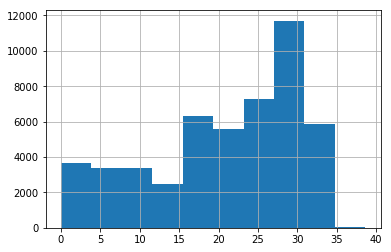

In [60]:
df['AccountAge'].hist()

## Variable encoding

In [61]:
# Label Encoding the binary variables 
for col in df.select_dtypes(include = ['object']).columns[1:]:
    if len(list(df[col].unique()))<=2:
        LabelEncoder.fit(df[col])
        df[col]= labelEncoder.transform(df[col])
# One Hot encoding the categorical variables with more than 2 labels
df  = pd.get_dummies(df, drop_first= 'true')

In [62]:
df.shape

(49693, 72)

In [63]:
df.head()

,account_id,status,arrhes_day,price_program,arrhes,total_amount,invoce_model,total_payed,cutoff_days,day_disabled,written_off,id_tenant,replacement,AccountAge,SinceLastPay,group_name_Caution 5000,group_name_Chef 4500/4500,group_name_Chef_PrePayee_0/3500,group_name_Chef_PrePayee_4250/4250,group_name_PAYG - GIE Sunu Yaye / 5000,group_name_PAYG 9000/4500,group_name_PAYG Cash Sales - 70000,group_name_Paiement Annuel 35 000 / 35 000,group_name_Pilot Mbour - 3500/3500,group_name_PrePayee _3500/3500,group_name_PrePayee_8500/4250,group_name_Rechargeable Hair Clipper,group_name_SolarFAN - Cash - NGR,group_name_Vente Annuelle (41500 x 2),group_name_WOW60 Annuel - 41500x2,group_name_WOW60 Cash - 70000,group_name_WOW60 Mensuel - 8500/4250,group_name_WOW60 Promotion Annuel - 35000x2,group_name_WOW60 Promotion Cash - 60000,group_name_WowSolar TV - Cash 255000,group_name_WowSolar TV Annuel - 140000x2,group_name_WowSolar TV Mensuel - 55500/12500,group_name_WowSolar TV Promotion Cash - 220000,group_name_WowSolar100 - 7500/3750 - NGR,group_name_WowSolar100 - Annual - NGR,group_name_WowSolar100 - Cash - NGR,group_name_WowSolar100 - Monthly - NGR,group_name_WowSolar60 - Annuel - BF,group_name_WowSolar60 - Annuel - ML,group_name_WowSolar60 - Cash - BF,group_name_WowSolar60 - Cash - ML,group_name_WowSolar60 - Mensuel - BF,group_name_WowSolar60 - Mensuel - ML,group_name_WowSolar60 - chef - BF,group_name_WowSolar60_Annuelle 41500x2,group_name_WowSolar60_Mensuelle 8500/4250,"group_name_WowSolar60_Vente 70,000CFA",group_name_WowSolarTV - Annuel - BF,group_name_WowSolarTV - Annuel - ML,group_name_WowSolarTV - Annuel - NGR,group_name_WowSolarTV - Annuité - SN,group_name_WowSolarTV - Cash - BF,group_name_WowSolarTV - Cash - ML,group_name_WowSolarTV - Cash - NGR,group_name_WowSolarTV - Cash - SN,group_name_WowSolarTV - Mensualité - GIE Sunu yaye - SN,group_name_WowSolarTV - Mensuel - BF,group_name_WowSolarTV - Mensuel - ML,group_name_WowSolarTV - Mensuel - SN,group_name_WowSolarTV - Mensuel Pilote - BF,group_name_WowSolarTV - Monthly - NGR,group_name_chef - 4500/4500,product_type_Solar Fan,product_type_Sun King Home 60 Easy Buy,product_type_WowSolar100,product_type_WowSolar60,product_type_WowSolarTV19
0,9898,0,30.0,3500.0,3500.0,126000,1,108200,18.0,10,False,1,False,30.201197,11.499234,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,12951,0,30.0,3500.0,3500.0,126000,1,107750,24.0,28,False,1,True,29.475715,5.699014,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,32338,0,30.0,3500.0,3500.0,126000,1,66500,1.0,27,False,1,True,19.564920,28.123058,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,12600,0,30.0,3500.0,3500.0,126000,1,105000,5.0,7,False,1,False,29.613549,24.147083,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,30986,1,30.0,4250.0,8500.0,106250,1,25500,-142.0,475,False,1,False,20.646899,171.140734,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [67]:
num_var = df.dtypes[df.dtypes=='bool'].index

In [68]:
num_var

Index(['written_off', 'replacement'], dtype='object')

In [69]:
df.dtypes[df.dtypes!='bool']

account_id                                                   int64
status                                                       int64
arrhes_day                                                 float64
price_program                                              float64
arrhes                                                     float64
total_amount                                                 int64
invoce_model                                                 int64
total_payed                                                  int64
cutoff_days                                                float64
day_disabled                                                 int64
id_tenant                                                    int64
AccountAge                                                 float64
SinceLastPay                                               float64
group_name_Caution 5000                                      uint8
group_name_Chef 4500/4500                                    u